In [1]:
import sys 
sys.path.append('..')
from Data import gener_dt
from Tools import MI, Imputers, Metrics, HG_tools

import numpy as np
import pandas as pd
import statsmodels.api as sm
import math

import pyampute
from pyampute.ampute import MultivariateAmputation

from tqdm import tqdm
from importlib import reload

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
%matplotlib inline

In [2]:
reload(Imputers)
reload(MI)
reload(gener_dt)
reload(Metrics)
reload(HG_tools)

<module 'Tools.HG_tools' from '/Users/ash/Desktop/MICE/PY/Tools/HG_tools.py'>

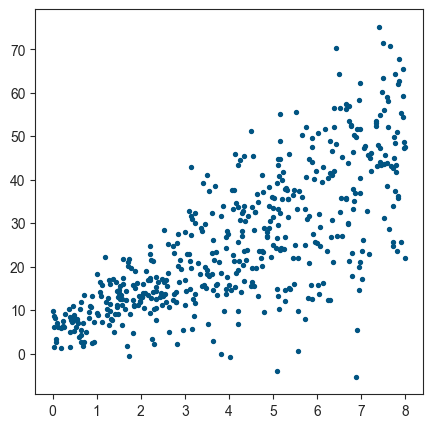

In [25]:
df = gener_dt.gener(X_distr = 'unif', scenar = 'lr_inter')

fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:deep sea blue')
plt.show()

In [26]:
df

,X,Y,XZ,Z
0,7.834853,35.840641,24.210359,3.090085
1,3.337968,18.390349,11.039719,3.307317
2,2.496140,13.502351,7.354512,2.946353
3,3.933411,24.376902,15.737234,4.000913
4,3.147525,19.747840,12.062571,3.832399
...,...,...,...,...
495,1.722742,21.750151,12.225518,7.096547
496,3.374482,28.936795,19.174702,5.682266
497,1.460188,10.763047,5.102857,3.494657
498,0.472158,11.018306,3.156191,6.684612


In [27]:
X_miss = HG_tools.amp(df)

2023-04-09 21:04:02,248 [WARNING] Indicated weights for incomplete vars for a pattern with MAR. Did you mean MAR+MNAR?


In [28]:
X_miss

,X,Y,XZ,Z
0,7.834853,35.840641,24.210359,3.090085
1,3.337968,18.390349,11.039719,3.307317
2,2.496140,13.502351,7.354512,2.946353
3,3.933411,24.376902,15.737234,4.000913
4,3.147525,19.747840,12.062571,3.832399
...,...,...,...,...
495,1.722742,21.750151,12.225518,7.096547
496,3.374482,28.936795,19.174702,5.682266
497,1.460188,10.763047,5.102857,3.494657
498,0.472158,11.018306,3.156191,6.684612


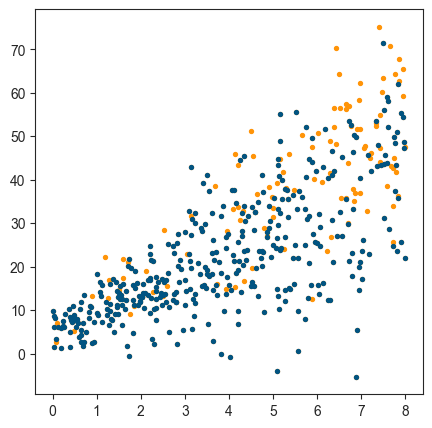

In [37]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')
plt.scatter(X_miss['X'], X_miss['Y'], s = 8, c = 'xkcd:deep sea blue')
#plt.xlim(-1, 6)
#plt.ylim(-1, 60)
plt.show()

In [30]:
# df['meth'] = 'full'
# X_miss['meth'] = 'amputed'
    
# df_merged = pd.concat([df, X_miss], ignore_index = True).sample(frac=1)

# colors = {'amputed':'xkcd:deep sea blue', 'full':'xkcd:tangerine'}    
# fig, ax = plt.subplots(figsize = (5, 5))
# plt.scatter( df_merged['X'], df_merged['Y'], s = 5, c = df_merged['meth'].map(colors), alpha = 0.8 )


# plt.show()

In [31]:
# X_miss[['X', 'Y', 'X^2']]

In [38]:
imp_br = pd.DataFrame(np.array(Imputers.impute(X_miss, 'mice_br')).mean(axis = 0), columns = df.columns)
imp_rf = pd.DataFrame(np.array(Imputers.impute(X_miss, 'mice_rf')).mean(axis = 0), columns = df.columns)

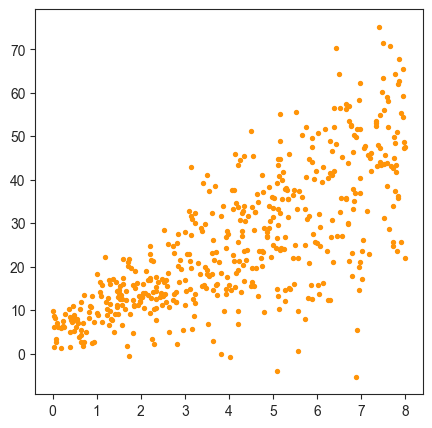

In [39]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')
plt.show()

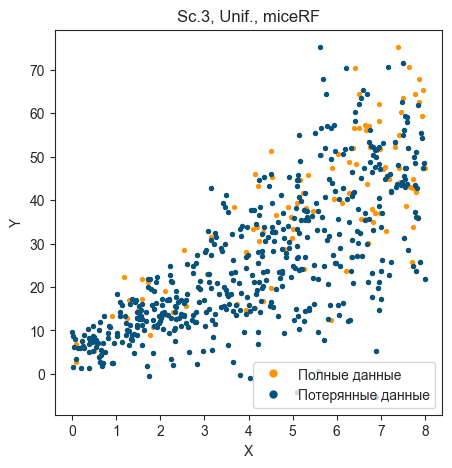

In [77]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')
plt.scatter(imp_rf['X'], imp_rf['Y'], s = 8, c = 'xkcd:deep sea blue')

orange_circle = Line2D([0], [0], marker = 'o', color = 'w', label = 'Полные данные',
                        markerfacecolor = 'xkcd:tangerine', markersize = 7)
blue_circle = Line2D([0], [0], marker = 'o', color = 'w', label = 'Потерянные данные',
                        markerfacecolor = 'xkcd:deep sea blue', markersize = 7)
plt.legend(handles = [orange_circle, blue_circle], loc=4)

plt.xlabel("X")
plt.ylabel("Y")
plt.title('Sc.3, Unif., miceRF' )

plt.show()

fig.savefig('/Users/ash/Desktop/MICE/PY/RF_Ridge_ubderfit.png', format = 'png',transparent=True)

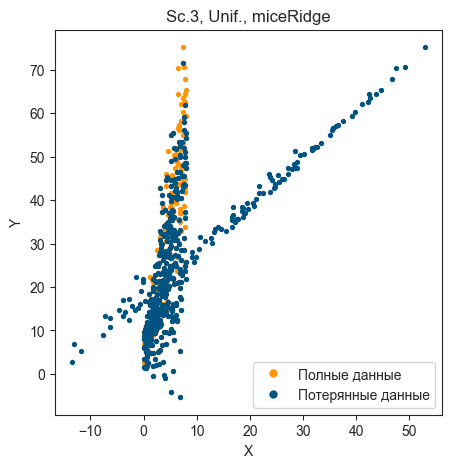

In [76]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')
plt.scatter(imp_br['X'], imp_br['Y'], s = 8, c = 'xkcd:deep sea blue')
#plt.xlim(-1, 6)
#plt.ylim(-1, 60)

orange_circle = Line2D([0], [0], marker = 'o', color = 'w', label = 'Полные данные',
                        markerfacecolor = 'xkcd:tangerine', markersize = 7)
blue_circle = Line2D([0], [0], marker = 'o', color = 'w', label = 'Потерянные данные',
                        markerfacecolor = 'xkcd:deep sea blue', markersize = 7)
plt.legend(handles = [orange_circle, blue_circle], loc=4)

plt.xlabel("X")
plt.ylabel("Y")
plt.title('Sc.3, Unif., miceRidge' )

plt.show()

fig.savefig('/Users/ash/Desktop/MICE/PY/Ridge_ubderfit.png', format = 'png',transparent=True)

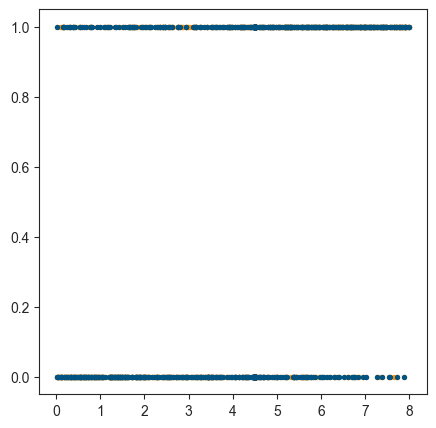

In [14]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')
plt.scatter(imp_rf['X'], imp_rf['Y'], s = 8, c = 'xkcd:deep sea blue')
#plt.xlim(-1, 6)
#plt.ylim(-1, 60)
plt.show()

In [15]:
df_cofs = MI.coefs_vars(df, "lin_regr")
df_cofs

(const    0.187376
 X        0.053242
 X^2      0.006309
 dtype: float64,
 const    0.040130
 X        0.023826
 X^2      0.002942
 dtype: float64)

In [16]:
imp_cofs = MI.coefs_vars(imp_br, "lin_regr")
imp_cofs

(const    0.180390
 X        0.040832
 X^2      0.009033
 dtype: float64,
 const    0.045247
 X        0.027116
 X^2      0.003370
 dtype: float64)

In [18]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
y_train = df['Y']
x_train = df['X']
i = 1
if i == 0:
    init = [1 / np.var(y_train), 1.0]  # Default values
elif i == 1:
    init = [1.0, 1e-3]
reg.set_params(alpha_init=init[0], lambda_init=init[1])
reg.fit(
    df[[col for col in df.columns if col != "Y"]], 
    y_train
)


x_ = np.linspace(np.min(df["X"]), np.max(df["X"]), 500)
y_ = np.linspace(np.min(df["Y"]), np.max(df["Y"]), 500)
xz_ = np.linspace(np.min(df["XZ"]), np.max(df["XZ"]), 500)
z_ = np.linspace(np.min(df["Z"]), np.max(df["Z"]), 500)
df_test = pd.DataFrame(data = np.array([x_, xz_, z_]).T, 
                       columns=[col for col in df.columns if col != "Y"])

ymean, ystd = reg.predict(df_test, return_std=True)

plt.scatter(x_, ymean, color="red", label="predict mean")
plt.scatter(df["Z"], df["Y"], color="red", label="predict mean")

KeyError: 'XZ'

In [ ]:

ymean, ystd = reg.predict(X_test, return_std=True)


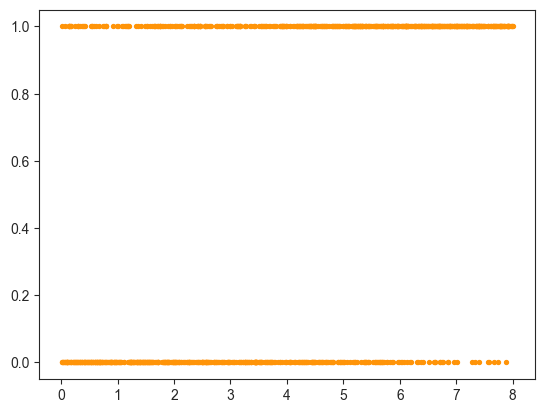

In [19]:
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')

In [20]:
plt.scatter(imp_br['XZ'], imp_br['Y'], s = 8, c = 'xkcd:deep sea blue')

KeyError: 'XZ'

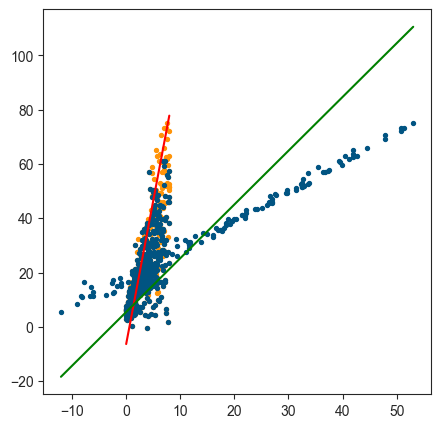

In [133]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')
tt_X = np.linspace(min(df['X']), max(df['X']), 1000)
tt_XZ = np.linspace(min(df['XZ']), max(df['XZ']), 1000)
tt_Z = np.linspace(min(df['Z']), max(df['Z']), 1000)
df_cofs = MI.coefs_vars(df, "lin_regr")
plt.plot(tt_X, df_cofs[0][0] + df_cofs[0][1] * tt_X + df_cofs[0][2] * tt_XZ + df_cofs[0][3] * tt_Z, c = 'r')

plt.scatter(imp_br['X'], imp_br['Y'], s = 8, c = 'xkcd:deep sea blue')
tt_imp_X = np.linspace(min(imp_br['X']), max(imp_br['X']), 1000)
tt_imp_XZ = np.linspace(min(imp_br['XZ']), max(imp_br['XZ']), 1000)
tt_imp_Z = np.linspace(min(imp_br['Z']), max(imp_br['Z']), 1000)
imp_cofs = MI.coefs_vars(imp_br, "lin_regr")
plt.plot(tt_imp_X, imp_cofs[0][0] + imp_cofs[0][1] * tt_imp_X + imp_cofs[0][2] * tt_imp_XZ + imp_cofs[0][3] * tt_imp_Z, c = 'g')

#plt.xlim(-1, 8)
#plt.ylim(-1, 80)
plt.show()

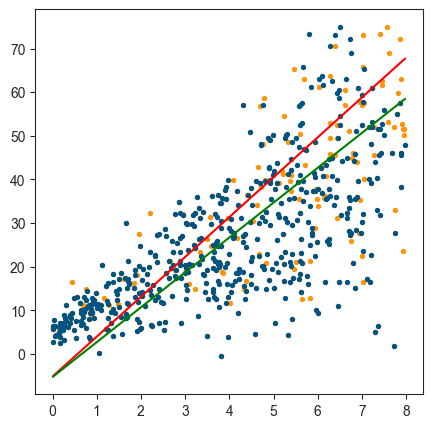

In [123]:
fig, ax = plt.subplots(figsize = (5, 5))
plt.scatter(df['X'], df['Y'], s = 8, c = 'xkcd:tangerine')
tt_X = np.linspace(min(df['X']), max(df['X']), 1000)
tt_XZ = np.linspace(min(df['XZ']), max(df['XZ']), 1000)
df_cofs = MI.coefs_vars(df, "lin_regr")
plt.plot(tt_X, df_cofs[0][0] + df_cofs[0][1] * tt_X + df_cofs[0][2] * tt_XZ, c = 'r')

plt.scatter(imp_rf['X'], imp_rf['Y'], s = 8, c = 'xkcd:deep sea blue')
tt_imp_X = np.linspace(min(imp_rf['X']), max(imp_rf['X']), 1000)
tt_imp_XZ = np.linspace(min(imp_rf['XZ']), max(imp_rf['XZ']), 1000)
imp_cofs = MI.coefs_vars(imp_rf, "lin_regr")
plt.plot(tt_imp_X, imp_cofs[0][0] + imp_cofs[0][1] * tt_imp_X + imp_cofs[0][2] * tt_imp_XZ, c = 'g')

#plt.xlim(-1, 8)
#plt.ylim(-1, 80)
plt.show()

In [ ]:
imp_br = pd.DataFrame(np.array( MI.mice(X_miss, estimator = BayesianRidge(), n_imp = 5).mean(axis = 0), columns = df.columns)

In [50]:
    from sklearn import decomposition, datasets
    from sklearn.linear_model import Ridge
    from sklearn.pipeline import Pipeline
    from sklearn.model_selection import GridSearchCV, cross_val_score
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import RepeatedKFold

In [63]:
X = df.loc[:, df.columns != 'Y']
Y = df['Y']

In [67]:
model = Ridge()

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

In [68]:
from numpy import arange

grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

In [69]:
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, Y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.000
Config: {'alpha': 0.0}
